In [2]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
# Binomial Distributon
# Given data
n = 10  # Number of trials
p = 0.8  # Probability of success (buying souvenir)

#1. Probability that every visitor buys a souvenir (X = 10)
prob_all_buy = stats.binom.pmf(10, n, p)
print(f"Probability that every visitor buys a souvenir: {prob_all_buy:.5f}")

#2. Probability that a maximum of 7 visitors buy souvenirs (X <= 7)
prob_max_7_buy = stats.binom.cdf(7, n, p)
print(f"Probability that a maximum of 7 visitors buy souvenirs: {prob_max_7_buy:.5f}")

Probability that every visitor buys a souvenir: 0.10737
Probability that a maximum of 7 visitors buy souvenirs: 0.32220


In [6]:
# Continuous Uniform Distribution
#Importing the dataset and displaying
debug=pd.read_csv("C:/Users/ksc14/Downloads/debug.csv")
debug.head

<bound method NDFrame.head of       Bug ID  Time Taken to fix the bug
0      12986                       2.42
1      12987                       2.03
2      12988                       2.74
3      12989                       3.21
4      12990                       3.40
...      ...                        ...
2093   15079                       4.17
2094   15080                       1.05
2095   15081                       2.50
2096   15082                       2.85
2097   15083                       2.64

[2098 rows x 2 columns]>

In [8]:
# Extract debugging times (assuming the column is named 'Time')
debugging_times = debug['Time Taken to fix the bug']

# Get the minimum and maximum times for uniform distribution parameters
a = debugging_times.min()
b = debugging_times.max()

# 1. Probability that debugging takes less than 3 hours (P(X < 3))
prob_less_than_3 = stats.uniform.cdf(3, loc=a, scale=b-a)
print(f"Probability that debugging takes less than 3 hours: {prob_less_than_3:.5f}")

# 2. Probability that debugging takes more than 2 hours (P(X > 2))
prob_more_than_2 = 1 - stats.uniform.cdf(2, loc=a, scale=b-a)
print(f"Probability that debugging takes more than 2 hours: {prob_more_than_2:.5f}")

# 3. 50th percentile (median of debugging time)
percentile_50 = stats.uniform.ppf(0.5, loc=a, scale=b-a)
print(f"50th percentile of debugging time: {percentile_50:.5f}")

Probability that debugging takes less than 3 hours: 0.49875
Probability that debugging takes more than 2 hours: 0.75188
50th percentile of debugging time: 3.00500


In [12]:
# Normal Distribution 
# Loading the dataset
score = pd.read_csv("C:/Users/ksc14/Downloads/student_score.csv")
score.head()

,student_id,score
0,1,1018
1,2,1218
2,3,611
3,4,723
4,5,541


In [14]:
# Extract the SAT scores (assuming the column is named 'Score')
sat_scores = score['score']

# Calculate the mean and standard deviation of SAT scores
mean_score = np.mean(sat_scores)
std_dev = np.std(sat_scores)

# 1. Probability that a student scores less than 800
prob_less_than_800 = stats.norm.cdf(800, loc=mean_score, scale=std_dev)
print(f"Probability of scoring less than 800: {prob_less_than_800:.5f}")

# 2. Probability that a student scores more than 1300
prob_more_than_1300 = 1 - stats.norm.cdf(1300, loc=mean_score, scale=std_dev)
print(f"Probability of scoring more than 1300: {prob_more_than_1300:.5f}")

# 3. Minimum marks to secure 90th percentile
score_90th_percentile = stats.norm.ppf(0.9, loc=mean_score, scale=std_dev)
print(f"Minimum score to be in the 90th percentile: {score_90th_percentile:.2f}")

# 4. Minimum marks to be in the top 5%
score_top_5_percent = stats.norm.ppf(0.95, loc=mean_score, scale=std_dev)
print(f"Minimum score to be in the top 5%: {score_top_5_percent:.2f}")

Probability of scoring less than 800: 0.15497
Probability of scoring more than 1300: 0.07611
Minimum score to be in the 90th percentile: 1269.31
Minimum score to be in the top 5%: 1343.54


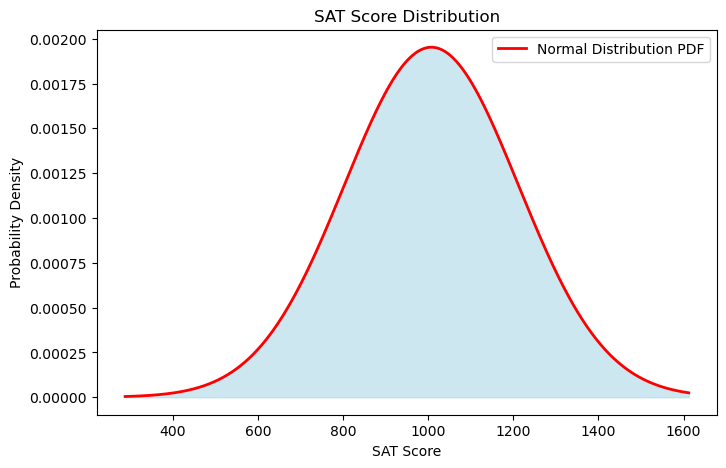

In [16]:
# Plotting the SAT score distribution
x = np.linspace(min(sat_scores), max(sat_scores), 1000)
pdf = stats.norm.pdf(x, loc=mean_score, scale=std_dev)

plt.figure(figsize=(8, 5))
plt.plot(x, pdf, 'r-', lw=2, label='Normal Distribution PDF')
plt.fill_between(x, pdf, color='lightblue', alpha=0.6)
plt.title('SAT Score Distribution')
plt.xlabel('SAT Score')
plt.ylabel('Probability Density')
plt.legend()
plt.show()